
#TUGAS AKHIR PROYEK PPM

Anggota Kelompok :


*   Baghas Rizaluddin	(225150207111065)

*   Qyan Rommy Mario	(225150200111034)


*   Ahmad Faiz Ali Azmi              (225150207111072)


##Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import psutil
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## Data Preparation

In [ ]:
from google.colab import files # Mengimpor funsi import files

files.upload() # Menjalankan perintah import files untuk memasukan file dari local repository

Saving Heart_Disease_Prediction.csv to Heart_Disease_Prediction (3).csv


{'Heart_Disease_Prediction (3).csv': b'Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease\r\n70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence\r\n67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence\r\n57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence\r\n64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence\r\n74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence\r\n65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence\r\n56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence\r\n59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence\r\n60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence\r\n63,0,4,150,407,0,2,154,0,4,2,3,7,Presence\r\n59,1,4,135,234,0,0,161,0,0.5,2,0,7,Absence\r\n53,1,4,142,226,0,2,111,1,0,1,0,7,Absence\r\n44,1,3,140,235,0,2,180,0,0,1,0,3,Absence\r\n61,1,1,134,234,0,0,145,0,2.6,2,2,3,Presence\r\n57,0,4,128,303,0,2,159,0,0,1,1,3,Absence\r\n71,0,4,112,149,0,0,125,0,1.6,2,0,3,Absence\r\n46,1,4,140,311,0,0,120,1,1.8,2,2,7,Presence\r\n53,1,4,140,203,1

In [ ]:
data = pd.read_csv('Heart_Disease_Prediction.csv') # Menyimpan hasil import ke dalam variabel data

data.head() # Menampilkan 5 data teratas dari dataset

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## Penjelasan Fitur

1. Age : usia pasien dalam tahun
2. Sex : jenis kelamin pasien
         1 : pria
         2 : wanita
3. Chest Pain Type :
         1 : typical angina
         2 : atypical angina
         3 : non-angial pain
         4 : asymptomatic
4. BP : tekanan darah saat pasien beristirahat (mm Hg)
5. Cholestelor : total kolestelor dalam pembuluh darah (mg/dl)
6. FBS over 120 : tekanan gula darah saat puasa diatas 120mg/dl
         1 : True
         2 : False
7. EKG results : hasil elektrokardiografi saat istirahat
         Nilai 0: normal
         Nilai 1: mengalami kelainan gelombang ST-T (inversi gelombang T dan/atau elevasi atau depresi ST > 0,05 mV)
         Nilai 2: menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri berdasarkan kriteria Estes
8. Max HR : Detak jantung maksimal
9. Exercie angina : olahraga menyebabkan angina
         1 : True
         0 : False
10. ST depression : depresi st yang disebabkan oleh olahraga berbanding dengan istirahat
11. Slope of ST : kemiringan puncak latihan segmen ST
          Value 1: upsloping
          Value 2: flat
          Value 3: downsloping
12. Number of vessel : jumlah pembuluh besar (0-3) diwarnai dengan flourosopy
13. Thallium
          3 : normal
          6 : fixed defect
          7 : reversable defect
14. Heart Disease : klasifikasi hasil
          present : terdeteksi memiliki penyakit jantung / kardiovaskular
          absent : tidak terdeteksi memiliki penyakit jantung / kardiovaskular

In [ ]:
data.shape # Melihat total dimensi data

(270, 14)

In [ ]:
data.info() # Memberikan informasi type data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
data.isna().sum() # Mengecek kolum null

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [ ]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


## Data Preprocessing dan EDA

In [ ]:
# Merubah value objek pada colom heart disease menjadi numerik

categorical_cols = ['Heart Disease'] # Memilih kolom yang akan diubah

label_encoder = LabelEncoder()

for col in categorical_cols: # Mengambil kolom yang ada dalam categoricals_cols
    data[col] = label_encoder.fit_transform(data[col]) # Merubah value kolom menjadi bentuk numerik

data.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [ ]:
# Menghitung jumlah row berdasarkan nilai pada colum heart disease
classification_counts = data['Heart Disease'].value_counts()
print(classification_counts)

Heart Disease
0    150
1    120
Name: count, dtype: int64


In [ ]:
# Merubah colum dengan value 0 - 1 menjadi No - Yes (Object)

binary_cols = ['FBS over 120', 'Exercise angina', 'Heart Disease']

def yes_no(col): # Jika value dalam kolom adalah 1 maka ubah menjadi Yes, jika tidak ubah menjadi No
    return 'Yes' if col == 1 else 'No'

for col in binary_cols: # Masukkan perubahan ke dalam kolom yang berada dalam binary_cols
    data[col] = data[col].apply(yes_no)

data.head() # Melihat 5 data setelah diperbaharui

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,No,2,109,No,2.4,2,3,3,Yes
1,67,0,3,115,564,No,2,160,No,1.6,2,0,7,No
2,57,1,2,124,261,No,0,141,No,0.3,1,0,7,Yes
3,64,1,4,128,263,No,0,105,Yes,0.2,2,1,7,No
4,74,0,2,120,269,No,2,121,Yes,0.2,1,1,3,No


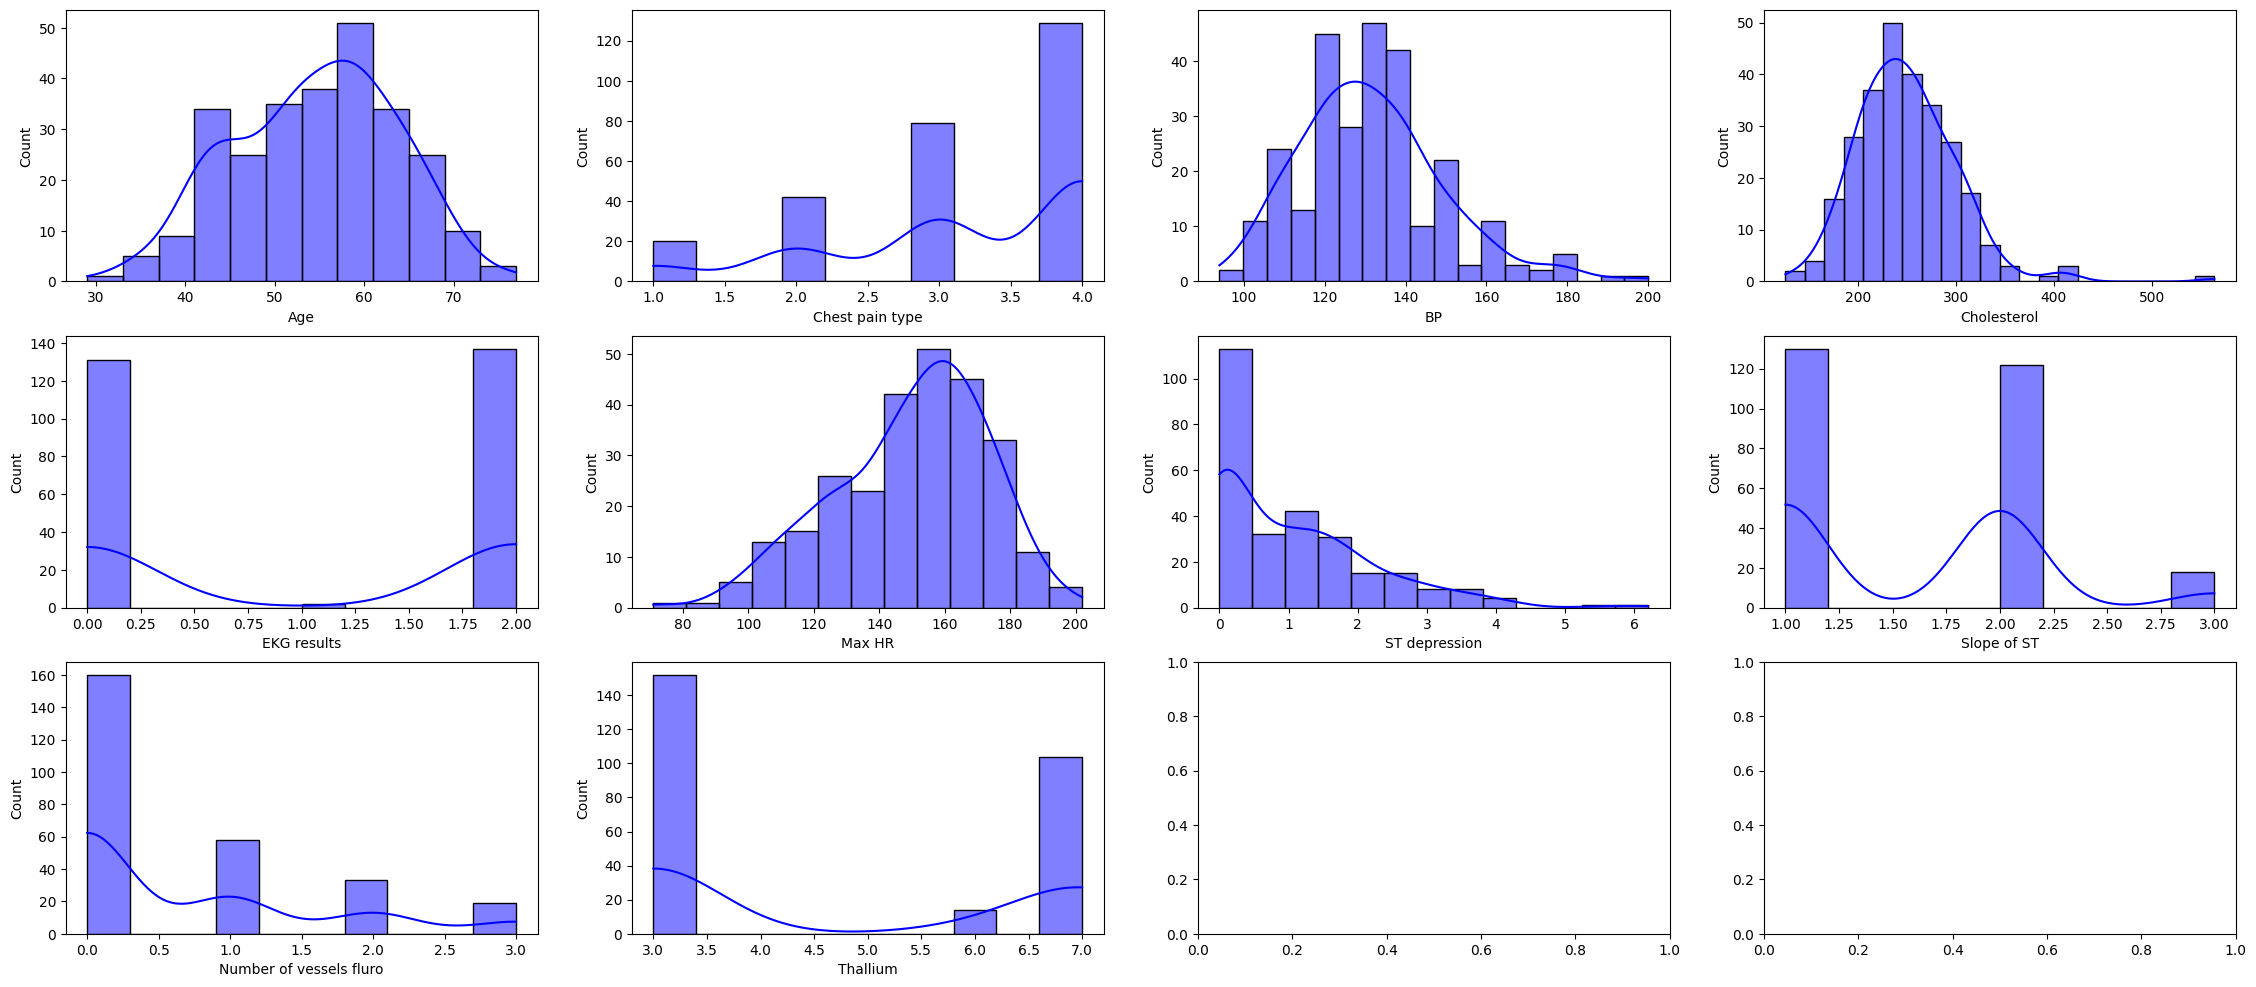

In [ ]:
# Visualisasi penyebaran data dengan histogram
numeric_cols = [col for col in data.columns if data[col].dtype != 'object' and col != 'Sex'] # Hanya memilih colom yang bukan object dan kolom sex
cols = 4
row = math.ceil(len(numeric_cols) / cols)

fig, axes = plt.subplots(nrows=row, ncols=cols, figsize=(28,12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data[col],color='blue', edgecolor='black', kde=True, ax=axes[i])

plt.show()

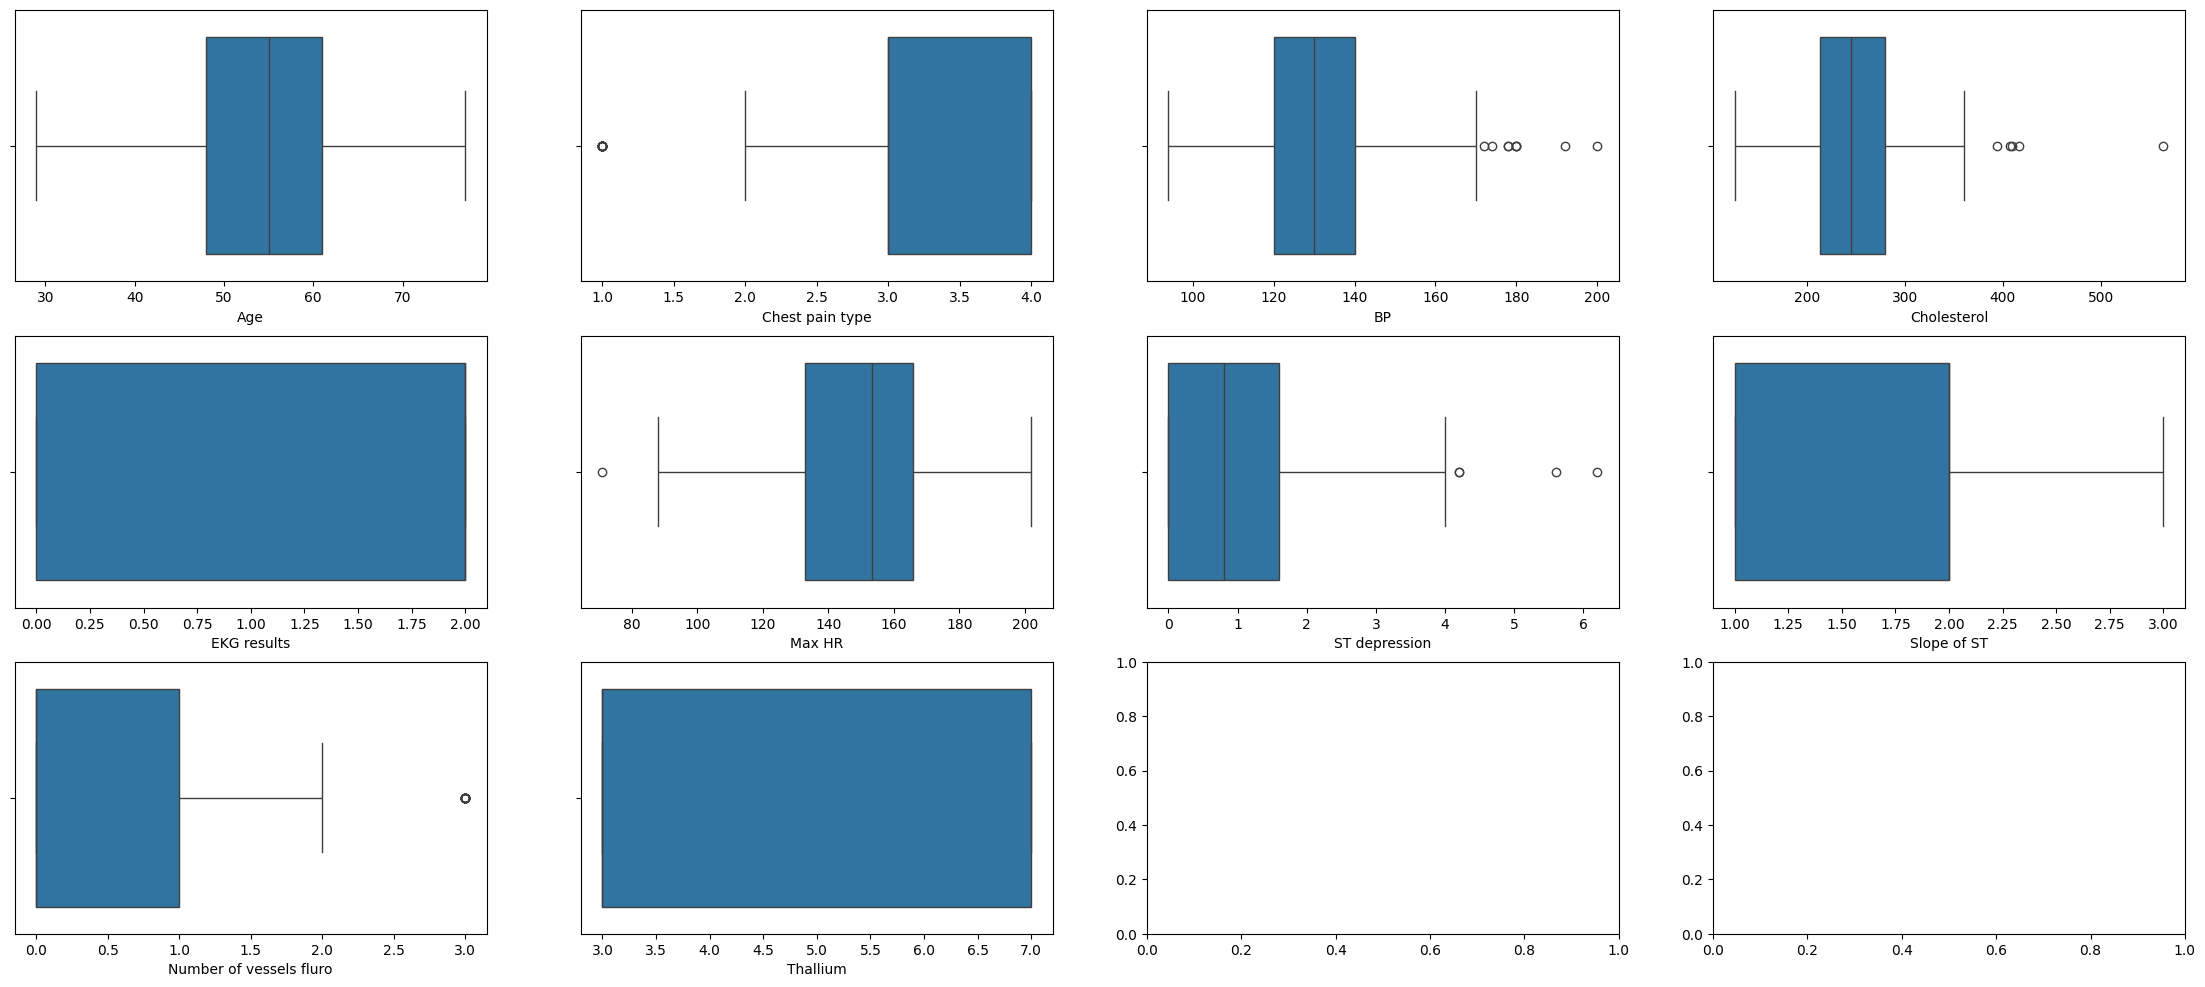

In [ ]:
# Visualisasi penyebaran data dengan histogram
numeric_cols = [col for col in data.columns if data[col].dtype != 'object' and col != 'Sex'] # Hanya memilih colom yang bukan object dan kolom sex
cols = 4
row = math.ceil(len(numeric_cols) / cols)

fig, axes = plt.subplots(nrows=row, ncols=cols, figsize=(28,12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=data[col], ax=axes[i]) # Tipe box plot

plt.show()

In [ ]:
# Penghapusan data outlier menggunakan teknik IQR
def iqr(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_filtered

# Memilih colom yang bukan object
for col in data.columns:
    if data[col].dtype != 'object' :
      data = iqr(data, col)

# Merubah pada dataset asli
data.reset_index(drop=True, inplace=True)
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,57,1,2,124,261,No,0,141,No,0.3,1,0,7,Yes
1,64,1,4,128,263,No,0,105,Yes,0.2,2,1,7,No
2,74,0,2,120,269,No,2,121,Yes,0.2,1,1,3,No
3,65,1,4,120,177,No,0,140,No,0.4,1,0,7,No
4,56,1,3,130,256,Yes,2,142,Yes,0.6,2,1,6,Yes


In [ ]:
categorical_cols = ['FBS over 120', 'Exercise angina', 'Heart Disease']

label_encoder = LabelEncoder()

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
1,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
2,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
3,65,1,4,120,177,0,0,140,0,0.4,1,0,7,0
4,56,1,3,130,256,1,2,142,1,0.6,2,1,6,1


In [ ]:
data.shape

(217, 14)

In [ ]:
# scn_data = data.copy()

# def age_group(Age):
#     if 20 <= Age <= 29 :
#         return '20 - 29'
#     elif 30 <= Age <= 39 :
#         return '30 - 39'
#     elif 40 <=  Age <= 49 :
#         return '40 - 49'
#     elif 50 <= Age <= 59 :
#         return '50 - 59'
#     elif 60 <= Age <= 69 :
#         return '60 - 69'
#     elif 70 <= Age <= 79 :
#         return '70 - 79'
#     else:
#         return '80 And Above'

# scn_data['Age Group'] = scn_data['Age'].apply(age_group)
# scn_data.drop(['Age'], axis=1, inplace=False)

# binary_cols = ['Sex']

# def male_female(col):
#     return 'Male' if col == 1 else 'Female'

# for col in binary_cols:
#     scn_data[col] = scn_data[col].apply(male_female)

# scn_data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,Age Group
0,57,Male,2,124,261,0,0,141,0,0.3,1,0,7,1,50 - 59
1,64,Male,4,128,263,0,0,105,1,0.2,2,1,7,0,60 - 69
2,74,Female,2,120,269,0,2,121,1,0.2,1,1,3,0,70 - 79
3,65,Male,4,120,177,0,0,140,0,0.4,1,0,7,0,60 - 69
4,56,Male,3,130,256,1,2,142,1,0.6,2,1,6,1,50 - 59


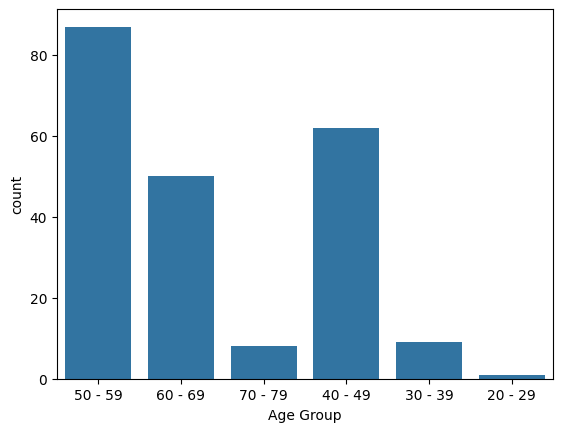

In [ ]:
# sns.countplot(x='Age Group', data=scn_data)
# plt.show()

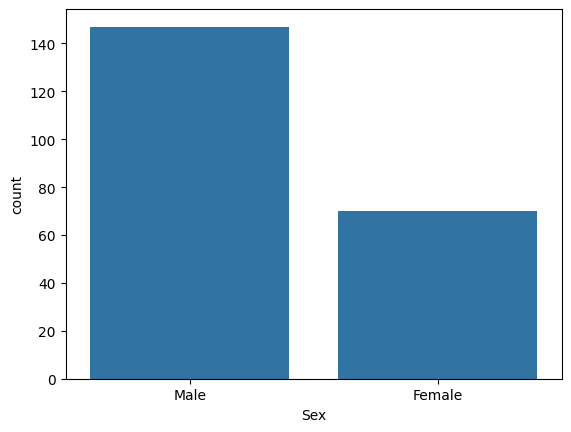

In [ ]:
# sns.countplot(x='Sex', data=scn_data)
# plt.show()

## Data Modeling


In [ ]:
# Mengubah seluruh data non integer menjadi integer / numerikal
label_encoder = LabelEncoder()

for col in data:
    data[col] = label_encoder.fit_transform(data[col])

data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,22,1,0,16,76,0,0,35,0,3,0,0,2,1
1,29,1,2,19,78,0,0,6,1,2,1,1,2,0
2,36,0,0,13,84,0,2,17,1,2,0,1,0,0
3,30,1,2,13,10,0,0,34,0,4,0,0,2,0
4,21,1,1,21,71,1,2,36,1,6,1,1,1,1


In [ ]:
# Membagi dataset menjadi kolom evaluasi (X) dan target (y)
array = data.values
X = array[:,0:13]
y = array[:,13]

# Membagi dataset menjadi data uji dan data latih dengan rasio 20 / 80
X_train, X_validation, y_train, y_validation = train_test_split(X,y,test_size=0.20, random_state=1, shuffle=True)

In [ ]:
# Melakukan standarisasi nilai pada dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.fit_transform(X_validation)

In [ ]:
# Fungsi untuk mengevaluasi pemodelan berdasarkan akurasi, presisi, recall, f1-score, auc dan waktu eksekusi
def evaluate(model, X_validation, y_validation):
    start_time = time.time() # Memulai waktu perhitungan eksekusi model
    process = psutil.Process()

    y_prediction = model.predict(X_validation)
    y_proba = model.predict_proba(X_validation)[:, 1]

    end_time = time.time() # Waktu eksekusi model berakhir

    accuracy = accuracy_score(y_validation, y_prediction) # Menghitung skor akurasi pemodelan
    precision = precision_score(y_validation, y_prediction, pos_label=1) # Menghitung skor presisi pemodelan
    recall = recall_score(y_validation, y_prediction, pos_label=1) # Menghitung skor recall pemodelan
    f1 = f1_score(y_validation, y_prediction, pos_label=1) # Menghitung skor recall pemodelan
    auc = roc_auc_score(y_validation, y_proba) # Menghitung skor AUC
    execution_time = end_time - start_time # Waktu eksekusi

    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1-Score: ", f1)
    print("AUC: ", auc)
    print("Execution Time (s): ", execution_time)

In [ ]:
# Evaluasi model random forest dengan feature lengkap
model_final = RandomForestClassifier(n_estimators=100, random_state=1)
model_final.fit(X_train, y_train)

evaluate(model_final, X_validation, y_validation)

Accuracy:  0.9090909090909091
Precision:  0.9411764705882353
Recall:  0.8421052631578947
F1-Score:  0.8888888888888888
AUC:  0.9463157894736842
Execution Time (s):  0.024634838104248047


In [ ]:
# Evaluasi model adaboost dengan feature lengkap
base_estimator = DecisionTreeClassifier(max_depth=1)
model_final = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=1)
model_final.fit(X_train, y_train)

evaluate(model_final, X_validation, y_validation)

Accuracy:  0.8181818181818182
Precision:  0.9230769230769231
Recall:  0.631578947368421
F1-Score:  0.7499999999999999
AUC:  0.9199999999999999
Execution Time (s):  0.01591777801513672


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
# Pengambilan feauture dengan tingkat korelasi tertinggi terhadap hasil colum Heart Disease
correlations = data.corr()['Heart Disease'].sort_values(ascending=False).reset_index()
correlations = correlations[correlations['index'] != 'Heart Disease']

# Menampilkan 5 kolom dengan korelasi tertinggi
top_features = correlations['index'].head(5)
print(top_features)

1                   Thallium
2            Chest pain type
3    Number of vessels fluro
4              ST depression
5            Exercise angina
Name: index, dtype: object


In [ ]:
# Membuat dataset baru untuk dibagi menjadi data latih dan uji dengan mengambil nilai korelasi tertinggi
X = data[top_features]
y = data['Heart Disease']
X_train, X_validation, y_train, y_validation = train_test_split(X,y,test_size=0.20, random_state=1, shuffle=True)

In [ ]:
# Merubah nilai pada dataset menjadi distribusi normal
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.fit_transform(X_validation)

In [ ]:
# Evaluasi model random forest dengan feature yang memiliki korelasi tertinggi
model_final = RandomForestClassifier(n_estimators=100, random_state=1)
model_final.fit(X_train, y_train)

evaluate(model_final, X_validation, y_validation)

Accuracy:  0.8636363636363636
Precision:  0.9333333333333333
Recall:  0.7368421052631579
F1-Score:  0.8235294117647058
AUC:  0.9589473684210525
Execution Time (s):  0.013128995895385742


In [ ]:
# Evaluasi model adaboost dengan feature yang memiliki korelasi tertinggi
base_estimator = DecisionTreeClassifier(max_depth=1)
model_final = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=1)
model_final.fit(X_train, y_train)

evaluate(model_final, X_validation, y_validation)

Accuracy:  0.9090909090909091
Precision:  0.9411764705882353
Recall:  0.8421052631578947
F1-Score:  0.8888888888888888
AUC:  0.8631578947368421
Execution Time (s):  0.012499332427978516


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
